In [ ]:
# Predict sales price of bulldozer using machine learning


# Kaggle dataset
# for any info visit https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [ ]:
df=pd.read_csv("/content/drive/My Drive/TrainAndValid.csv",low_memory=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

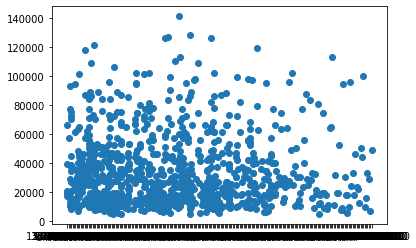

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [ ]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

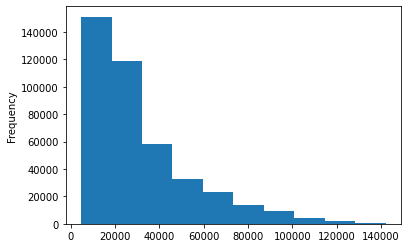

In [ ]:
df.SalePrice.plot.hist()

In [ ]:
# Parsing dates
# When we work with time series data,we want to enrich time & data component as much as possible.
# We can do that by telling which of our comlumns has dates in it using the parse_dates parameter


In [ ]:
df.saledate.dtype


dtype('O')

In [ ]:
# Import data again
df=pd.read_csv("/content/drive/My Drive/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

In [ ]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [ ]:
# Sort DataFrame by SaleDate
#  When working with time series data it's good practice to sort it by date

In [ ]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
# Make a copy of original data
# it's always good practice to make a copy of the original dataframe so when we manipulate the copy, we still got our original dataset

In [ ]:
# Make a copy
df_tmp=df.copy()

In [ ]:
# Add datetime parameters for saledate comlumn (visit pandas datetime)


In [ ]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [ ]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [ ]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["Salemonth"]=df_tmp.saledate.dt.month
df_tmp["Salemonth"]=df_tmp.saledate.dt.day
df_tmp["saleDayofweek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"]=df_tmp.saledate.dt.dayofyear

In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Now we have enriched our DataFrame with date time features , we can remove saledate column
df_tmp.drop("saledate",axis=1,inplace=True)

In [ ]:
# Check the value of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [ ]:
len(df_tmp)

412698

In [ ]:
# Convert string to categories
# One way we can turn all of our data into numbers is by converting them into pandas categories
# We can check the different datatypes compatible with pandas here:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html


In [ ]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])


True

In [ ]:
# Find the coulmns which contains strings
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# This will turn all of string value into category values
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label]=content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
 df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [ ]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [ ]:
# Fill missing values
# Fill numeric data first
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
Salemonth
saleDayofweek
saleDayofYear


In [ ]:
df_tmp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [ ]:
# Check for which numeric values have null values
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill numeric rows with median
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing (Created extra column so we could know that there was a missing value)
      df_tmp[label+"_is_missing"]=pd.isnull(content)
      # Fill missing numeric values with median
      df_tmp[label]=content.fillna(content.median())

In [ ]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [ ]:
pd.Categorical(df_tmp["UsageBand"]).codes
#Add +1 to make it non negative )

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [ ]:
# Filling and turning categorical values into numbers
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column indicate whether sample has missing values
    df_tmp[label+"_is_missing"]=pd.isnull(content)
    # Turn caytegories into numbers and add +1
    df_tmp[label]=pd.Categorical(content).codes+1

In [ ]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(9), int8(40)
memory usage: 77.9 MB


In [ ]:
# Modelling
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instaniate the model
model=RandomForestRegressor(n_jobs=-1,random_state=42)
# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875395214462578

In [ ]:
len(df_tmp)

412698

In [ ]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [ ]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [ ]:
# Split data into training and validation
df_val=df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_val),len(df_train)

(11573, 401125)

In [ ]:
# Split data into X and Y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [ ]:
# Create evaluation function (competition uses rmsle)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
  """
  Calculate root mean squared log error between predictions and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate function on a few differnt levels
def show_scores(model):
  train_preds=model.predict(X_train)
  val_preds=model.predict(X_valid)
  scores={"Training MAE":mean_absolute_error(y_train,train_preds),
          "Valid MAE":mean_absolute_error(y_valid,val_preds),
          "Training RMSLE":rmsle(y_train,train_preds),
          "Valid RMSLE":rmsle(y_valid,val_preds),
          "Training R^2":r2_score(y_train,train_preds),
          "Valid R^2":r2_score(y_valid,val_preds)}
  return scores

In [ ]:
# Reducing data to experiment
# we saw that to initate the model it took 12 mins so we will reduce our data to experiment with help of max_samples
# Change max samples value
# if we keep max_samples as default , it would see len(df_tmp)*n_estimator(100) which would take lot of time so we keep max_sample as 10000
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
%%time
model.fit(X_train,y_train)

CPU times: user 44.2 s, sys: 1.53 s, total: 45.7 s
Wall time: 29 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
show_scores(model)

{'Training MAE': 5560.074288339046,
 'Valid MAE': 7159.011648664997,
 'Training RMSLE': 0.2577138109741872,
 'Valid RMSLE': 0.2924144368173015,
 'Training R^2': 0.8607288838681761,
 'Valid R^2': 0.8326855590666682}

In [ ]:
# Hyperparameter tuning using Randomized Search CV
%%time
from sklearn.model_selection import RandomizedSearchCV
# Different randomforestregressor hyperpara
rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"]}

# Instantiate RamdomizedSearchCv model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

# Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 1min 23s, sys: 8.35 s, total: 1min 32s
Wall time: 3min 42s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best hyperpara
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': 3}

In [ ]:
# Evaluate the model
show_scores(rs_model)

{'Training MAE': 11875.011319211724,
 'Valid MAE': 13491.170542418184,
 'Training RMSLE': 0.5116325232505001,
 'Valid RMSLE': 0.5150740881095592,
 'Training R^2': 0.4855107226659072,
 'Valid R^2': 0.49209548280222926}

In [ ]:
# as we have set n_iter=2 , we havn't got best params , if we set n_iter=100, we would get better result as Daniel

In [ ]:
# Train a model with best Hyperparameters
%%time
# Most ideal Hyperparams
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_split=14,
                                  min_samples_leaf=1,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None)
# Fit the ideal model
ideal_model.fit(X_train,y_train)


CPU times: user 4min, sys: 1.27 s, total: 4min 1s
Wall time: 2min 35s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [ ]:
show_scores(ideal_model)

{'Training MAE': 2972.12344654917,
 'Valid MAE': 5947.873253168382,
 'Training RMSLE': 0.14528401893856677,
 'Valid RMSLE': 0.24454864702342247,
 'Training R^2': 0.9583778795847738,
 'Valid R^2': 0.8817080057474047}

In [ ]:
# Making predictions on test data
df_test=pd.read_csv("/content/drive/My Drive/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
# Make predictions on test data
  #test_preds=ideal_model.predict(df_test)

In [ ]:
# Preprocessing the data (getting the test dataset in the same format as our training dataset)
def preprocess_data(df):
  df["saleYear"] = df.saledate.dt.year
  df["Salemonth"] = df.saledate.dt.month
  df["Salemonth"] = df.saledate.dt.day
  df["saleDayofweek"] = df.saledate.dt.dayofweek
  df["saleDayofYear"] = df.saledate.dt.dayofyear
  df.drop("saledate", axis=1, inplace=True)

  # Fill the numeric values with medians
  for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing (Created extra column so we could know that there was a missing value)
         df[label+"_is_missing"]=pd.isnull(content)
      # Fill missing numeric values with median
         df[label]=content.fillna(content.median())

      # Fill categorical missing data and turn category into numbers
  for label,content in df.items():
     if not pd.api.types.is_numeric_dtype(content):
    # Add binary column indicate whether sample has missing values
       df[label+"_is_missing"]=pd.isnull(content)
    # Turn caytegories into numbers and add +1
       df[label]=pd.Categorical(content).codes+1

  return df

In [ ]:
# Process the test data
df_test=preprocess_data(df_test)

In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
# df test has 100 columns while X_train has 101 columns
# we can find how column differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
# Manually add df_test to have auctioneerID is missing column
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [ ]:
# Make predictions on test data
test_preds=ideal_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
test_preds

array([22481.67466608, 23430.54920049, 44370.08262673, ...,
       14549.67192625, 20629.14061183, 31376.39698153])

In [ ]:
# Format predictions into the same format Kaggle is asking for
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalePrice"]=test_preds

In [ ]:
df_preds

,SalesID,SalePrice
0,1227829,22481.674666
1,1227844,23430.549200
2,1227847,44370.082627
3,1227848,58732.361280
4,1227863,48641.139789
...,...,...
12452,6643171,46646.667628
12453,6643173,15751.385562
12454,6643184,14549.671926
12455,6643186,20629.140612


In [ ]:
# Feature importance
# Finding feature importance of our best model
ideal_model.feature_importances_

array([3.52513029e-02, 2.26906455e-02, 4.63707216e-02, 1.74439648e-03,
       3.44030529e-03, 1.93570608e-01, 3.14320446e-03, 1.01110475e-03,
       4.21435997e-02, 4.26814139e-02, 5.61128316e-02, 4.97321175e-03,
       1.33254954e-02, 1.31921894e-01, 4.60866341e-02, 6.23735894e-03,
       7.88418671e-03, 2.91129494e-03, 2.33277383e-03, 8.81055459e-02,
       5.55025284e-04, 9.88056272e-05, 1.08536875e-03, 1.66909249e-04,
       1.21759372e-03, 2.23387841e-05, 2.48901751e-03, 8.94009274e-03,
       8.34443492e-04, 2.08175076e-03, 7.78542532e-03, 1.67344381e-03,
       4.57829455e-03, 7.70292972e-04, 4.63528812e-04, 1.28017281e-02,
       9.84761690e-04, 1.06287765e-02, 1.72040269e-03, 1.65877777e-03,
       1.30311500e-03, 9.38661245e-04, 3.10793436e-03, 6.32368230e-04,
       2.38876191e-04, 3.63777813e-04, 2.79247936e-04, 2.60397998e-03,
       9.42930080e-04, 3.19939505e-04, 3.29108709e-04, 7.27629487e-02,
       5.86587365e-03, 3.04277877e-03, 1.16251194e-02, 2.83505787e-04,
      

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
  df=(pd.DataFrame({"features":columns,"feature_importances":importances})
      .sort_values("feature_importances",ascending=False).reset_index(drop=True))
  # Plot the dataframe
  fig,ax=plt.subplots()
  ax.barh(df["features"][:n],df["feature_importances"][:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature importance")
  ax.invert_yaxis()

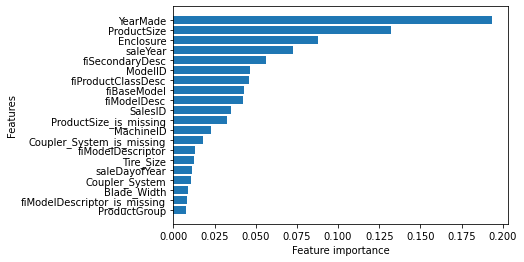

In [ ]:
plot_features(X_train.columns,ideal_model.feature_importances_)